# Assignment-05-Multi Linear Regression-(toyota_corolla)

Que.Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [101]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [102]:
data=pd.read_csv("D:\TUSHAR\Data Science\Assignmet QBS\Toyoto_Corrola.csv")

In [103]:
data

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [104]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [105]:
data.shape

(1436, 10)

In [106]:
data.describe()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,721.555014,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,416.476890,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,361.750000,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,721.500000,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,1081.250000,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,1442.000000,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


In [107]:
data.dtypes

Id            int64
Model        object
Price         int64
Age_08_04     int64
KM            int64
HP            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [108]:
df=data.drop(labels=None,index=None,columns=['Cylinders','Model',])
df

,Id,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,1,13500,23,46986,90,3,5,1165
1,2,13750,23,72937,90,3,5,1165
2,3,13950,24,41711,90,3,5,1165
3,4,14950,26,48000,90,3,5,1165
4,5,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...,...
1431,1438,7500,69,20544,86,3,5,1025
1432,1439,10845,72,19000,86,3,5,1015
1433,1440,8500,71,17016,86,3,5,1015
1434,1441,7250,70,16916,86,3,5,1015


In [109]:
df.columns

Index(['Id', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Gears', 'Weight'], dtype='object')

In [110]:
corr=df.corr() #checking correlation
corr

,Id,Price,Age_08_04,KM,HP,Doors,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


#### Plotting Heatmap to visualize the correlation between features

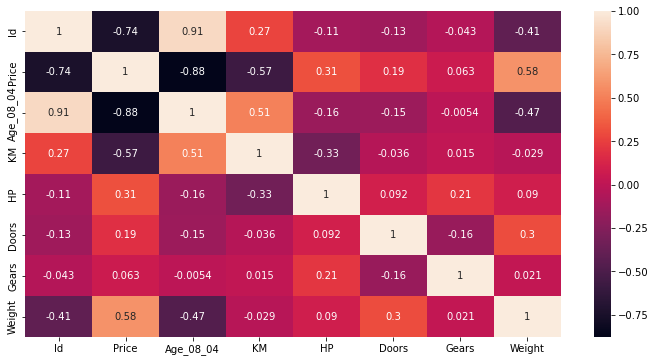

In [111]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
plt.show()

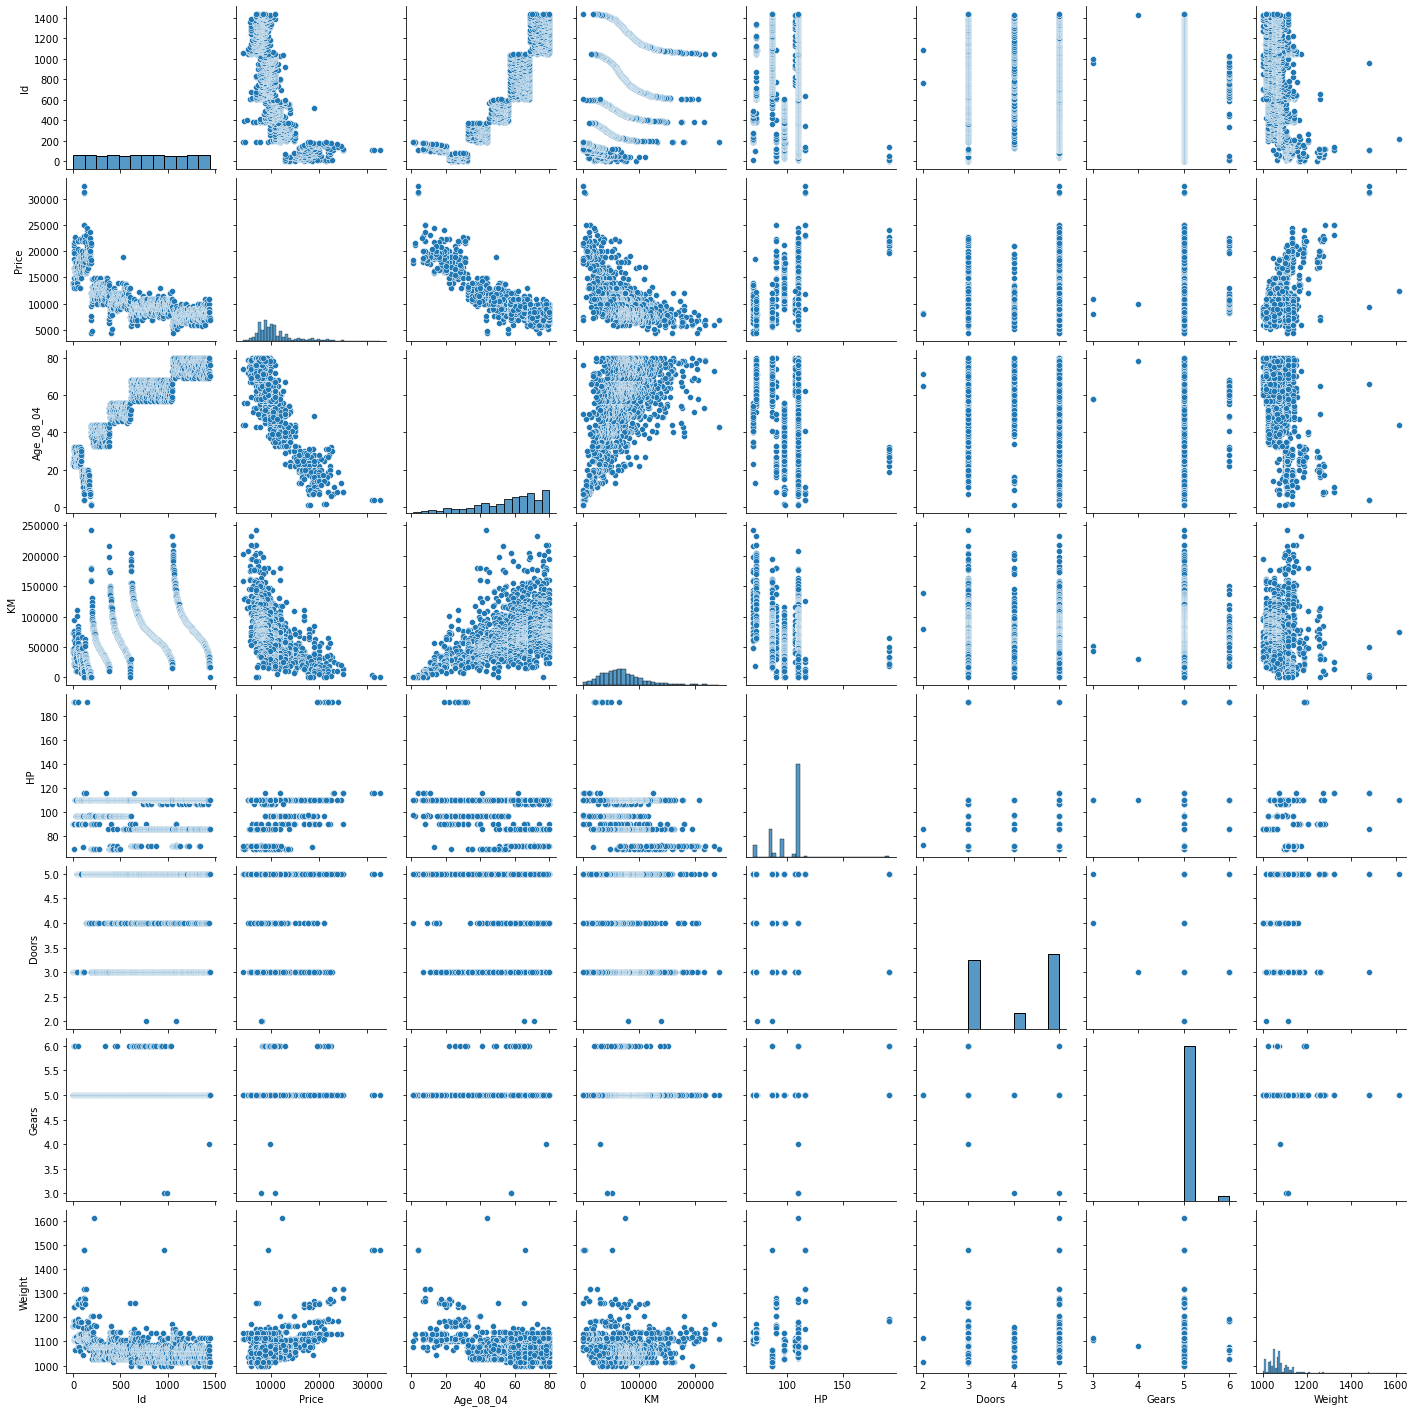

In [112]:
sns.pairplot(df)
plt.show()

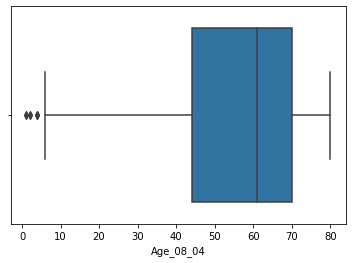

In [113]:
sns.boxplot('Age_08_04',data=df)
plt.show()

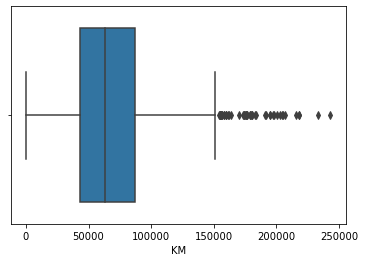

In [115]:
sns.boxplot('KM',data=df)
plt.show()

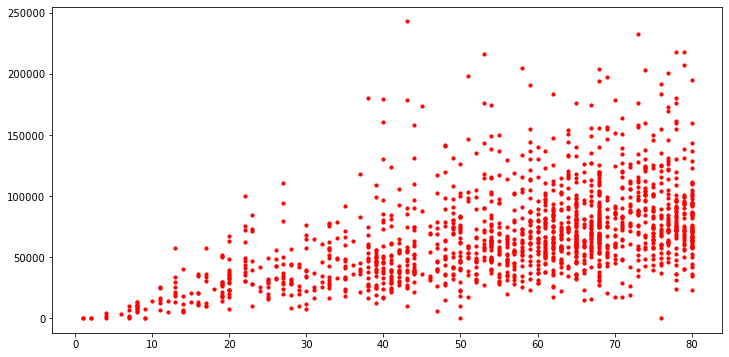

In [117]:
plt.figure(figsize=(12,6))
plt.scatter(x=data['Age_08_04'],y=data['KM'],s=10,color='red')
plt.show()

From above scatterplot, it seems like as age of vehicle increases then distance also increases.

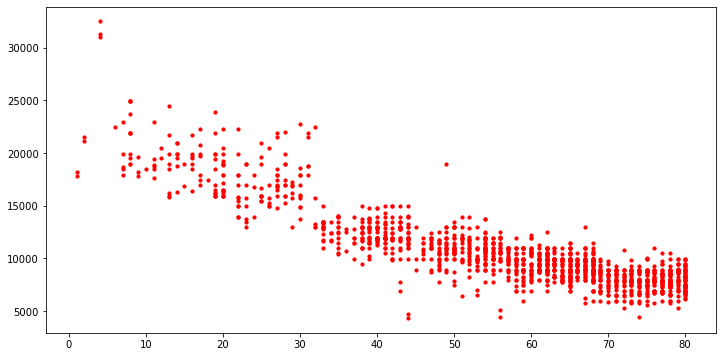

In [118]:
plt.figure(figsize=(12,6))
plt.scatter(x=data['Age_08_04'],y=data['Price'],s=10,color='red')
plt.show()

From above scatterplot, it seems like as age of vehicle increases then price decreases.

## Model Building

In [119]:
model=smf.ols('Price~Age_08_04+KM+HP+Doors+Gears',data=df).fit()

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1255.
Date:                Fri, 30 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:24:26   Log-Likelihood:                -12597.
No. Observations:                1436   AIC:                         2.521e+04
Df Residuals:                    1430   BIC:                         2.524e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.182e+04   1173.900     10.070      0.000    9518.979    1.41e+04
Age_08_04   -152.4287      2.609    -58.430      0.000    -157.546    -147.311
KM            -0.0124      0.001     -9.173      0.000      -0.015      -0.010
HP            32.8501      3.031     10.838      0.000      26.905      38.796
Doors        224.1765     44.889      4.994      0.000     136.120     312.233
Gears        804.9896    229.315      3.510      0.000     355.160    1254.820
==============================================================================
Omnibus:                      421.849   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3170.219
Skew:                           1.158   Prob(JB):                         0.00
Kurtosis:                       9.901   Cond. No.                     2.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Price Prediction

In [121]:
y=model.predict(df.iloc[:,1:])

In [122]:
y.head()

0    15388.632209
1    15067.612927
2    15301.456333
3    14918.802641
4    14426.604720
dtype: float64

In [123]:
data2=pd.concat([df,y],axis=1,)
data2.head()

,Id,Price,Age_08_04,KM,HP,Doors,Gears,Weight,0
0,1,13500,23,46986,90,3,5,1165,15388.632209
1,2,13750,23,72937,90,3,5,1165,15067.612927
2,3,13950,24,41711,90,3,5,1165,15301.456333
3,4,14950,26,48000,90,3,5,1165,14918.802641
4,5,13750,30,38500,90,3,5,1170,14426.604720


In [124]:
data2.iloc[:,[1,8]]

,Price,0
0,13500,15388.632209
1,13750,15067.612927
2,13950,15301.456333
3,14950,14918.802641
4,13750,14426.604720
...,...,...
1431,7500,8572.603337
1432,10845,8134.416763
1433,8500,8311.387982
1434,7250,8465.053728


**********